# Task
Act as a Head of FP&A (Financial Planning & Analysis) and conduct a comprehensive analysis of this dataset. Identify key financial trends, variances, and insights related to revenue, expenses, profitability, and cash flow. Highlight any anomalies, risks, or opportunities for cost savings and revenue growth. Provide visualizations where relevant and actionable recommendations based on your findings.

Here is all the data you need:
"beer_company_fpa_dataset.xlsx"

## Data loading

### Subtask:
Load the provided Excel file "beer_company_fpa_dataset.xlsx" into a Pandas DataFrame.


**Reasoning**:
Load the excel file into a pandas DataFrame and display the first 5 rows and the shape of the dataframe.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('beer_company_fpa_dataset.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'beer_company_fpa_dataset.xlsx' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Date  Region Product  Revenue (EUR)  Cost of Goods Sold (COGS) (EUR)  \
0 2022-01-01    EMEA     Ale      101338.44                        182483.55   
1 2022-01-02  Brazil     Ale      125488.96                        187730.07   
2 2022-01-03    EMEA   Stout      320541.70                         54087.99   
3 2022-01-04    EMEA     Ale      454854.40                        217690.09   
4 2022-01-05  Brazil   Lager      164936.33                        180156.39   

   Gross Profit (EUR)  Operating Expenses (EUR)  Operating Profit (EUR)  \
0           -81145.11                  19027.75              -100172.86   
1           -62241.11                  66260.92              -128502.03   
2           266453.71                  85105.56               181348.15   
3           237164.31                  72983.11               164181.20   
4           -15220.06                  79625.18               -94845.24   

   Net Profit (EUR)   EBITDA (EUR)  EBITDA Margin (%)  CAPEX (EUR)  \
0     -82148.596982  -68309.112391         -67.406911     60282.02   
1     -90391.922930 -109872.348744         -87.555390      7384.64   
2     143755.752406  202232.942518          63.090993     87846.71   
3     131258.596892  212732.688895          46.769403     87848.91   
4     -80470.903484  -88338.329318         -53.559049     33710.39   

   OPEX (EUR)  Cash Flow (EUR)  Inventory Levels  \
0     5717.60         67508.83           7487.08   
1    54059.74         96745.74           9526.80   
2    46994.49         54244.67          18351.42   
3    79226.50         76900.20           4598.47   
4    19893.54         83942.24           1095.50   

   Days Inventory Outstanding (DIO)  Days Sales Outstanding (DSO)  \
0                             76.23                         73.97   
1                             50.24                         82.57   
2                             86.49                         73.37   
3                             61.78                         43.91   
4                             73.94                         72.33   

   Days Payable Outstanding (DPO)  Net Working Capital (EUR)         Comments  
0                           77.74                    7483.31     Above target  
1                           34.65                    9574.72     Above target  
2                           46.94                   18377.85  Requires review  
3                           65.12                    4577.26        On target  
4                           45.38                    1122.45     Above target

(500, 20)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and key financial metrics.


**Reasoning**:
Explore the dataset by examining data types, missing values, descriptive statistics, distributions, time period, and relationships between financial metrics.



Data Types:
 Date                                datetime64[ns]
Region                                      object
Product                                     object
Revenue (EUR)                              float64
Cost of Goods Sold (COGS) (EUR)            float64
Gross Profit (EUR)                         float64
Operating Expenses (EUR)                   float64
Operating Profit (EUR)                     float64
Net Profit (EUR)                           float64
EBITDA (EUR)                               float64
EBITDA Margin (%)                          float64
CAPEX (EUR)                                float64
OPEX (EUR)                                 float64
Cash Flow (EUR)                            float64
Inventory Levels                           float64
Days Inventory Outstanding (DIO)           float64
Days Sales Outstanding (DSO)               float64
Days Payable Outstanding (DPO)             float64
Net Working Capital (EUR)                  float64
Comments          

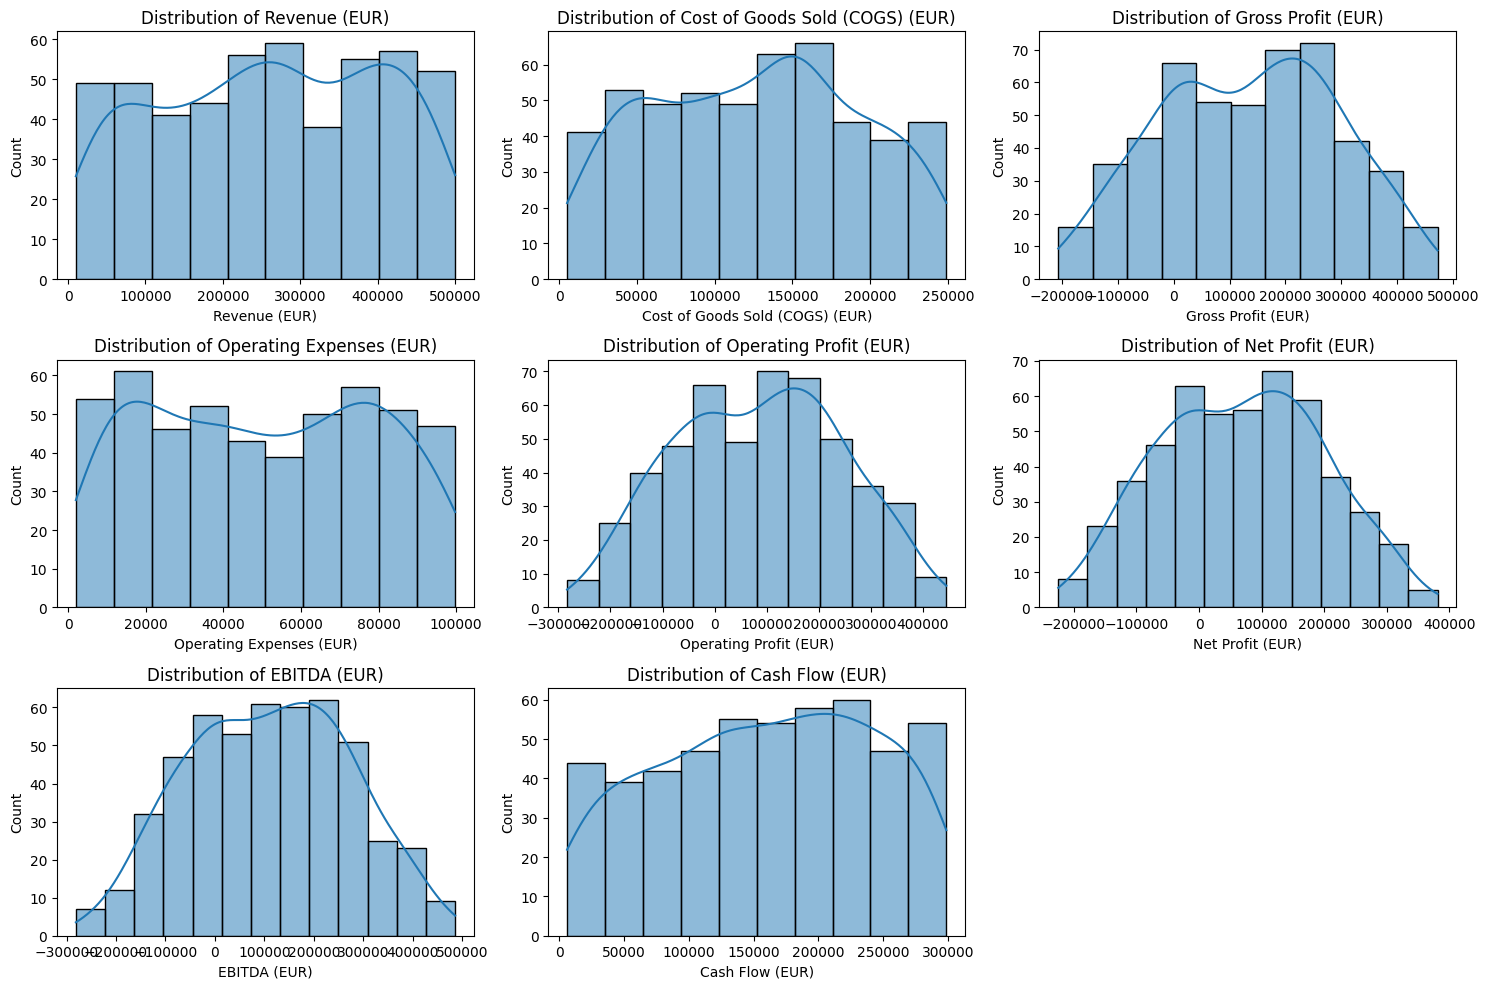


Time Period:
Start Date: 2022-01-01 00:00:00
End Date: 2023-05-15 00:00:00



Correlation Matrix:
                                  Revenue (EUR)  \
Revenue (EUR)                         1.000000   
Cost of Goods Sold (COGS) (EUR)      -0.013616   
Gross Profit (EUR)                    0.905732   
Operating Expenses (EUR)              0.003341   
Operating Profit (EUR)                0.888870   
Net Profit (EUR)                      0.885658   
EBITDA (EUR)                          0.884499   
Cash Flow (EUR)                       0.065701   

                                 Cost of Goods Sold (COGS) (EUR)  \
Revenue (EUR)                                          -0.013616   
Cost of Goods Sold (COGS) (EUR)                         1.000000   
Gross Profit (EUR)                                     -0.436145   
Operating Expenses (EUR)                                0.028756   
Operating Profit (EUR)                                 -0.433486   
Net Profit (EUR)                                       -0.430843   
EBITDA (EUR)                                       

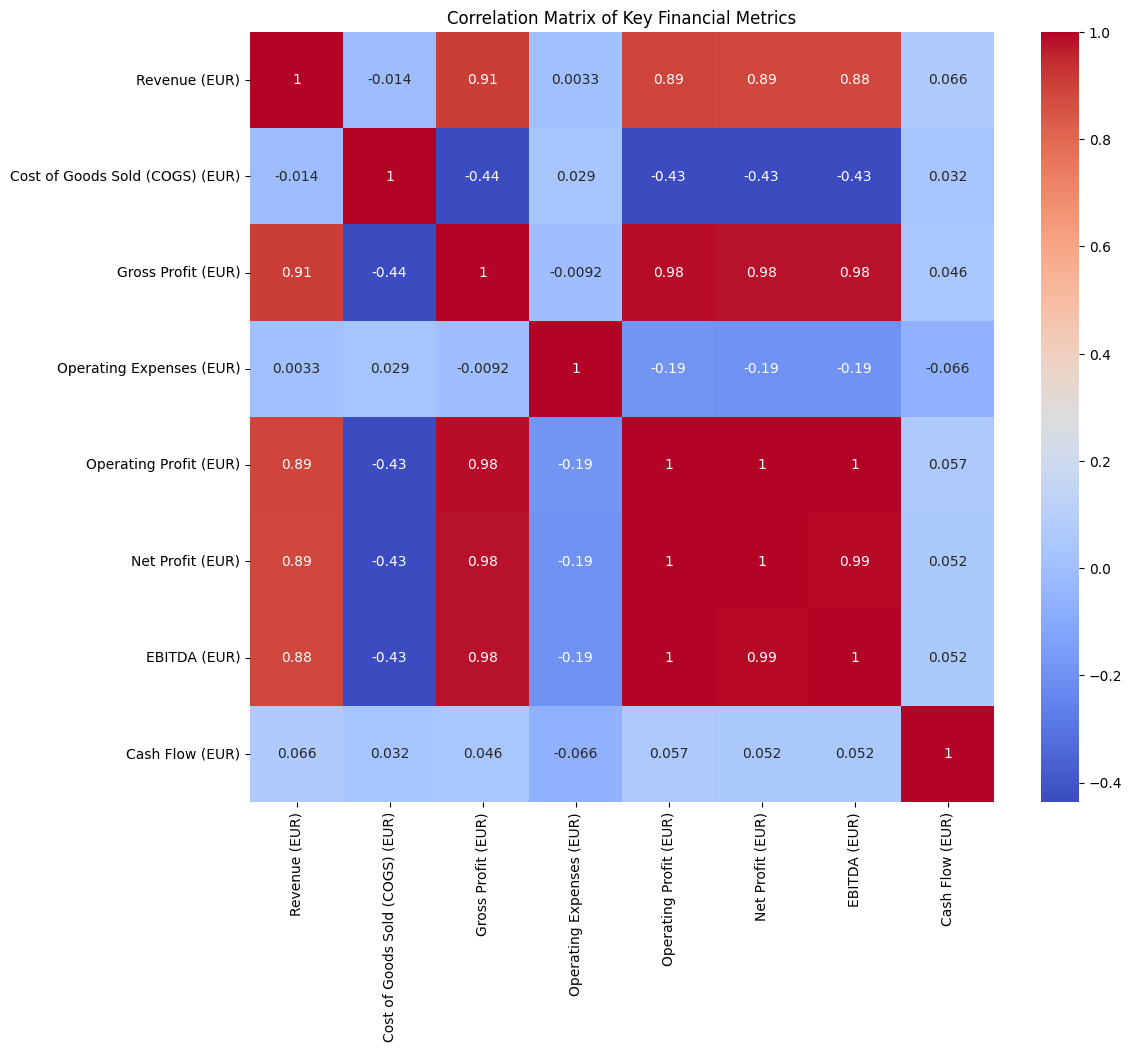

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Types and Inconsistencies
print("Data Types:\n", df.dtypes)

# 3. Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Visualize missing value patterns (optional, uncomment if needed)
# plt.figure(figsize=(12, 6))
# sns.heatmap(df.isnull(), cbar=False)
# plt.title('Missing Value Heatmap')
# plt.show()


# 4. Descriptive Statistics for Key Financial Metrics
key_metrics = ['Revenue (EUR)', 'Cost of Goods Sold (COGS) (EUR)', 'Gross Profit (EUR)',
               'Operating Expenses (EUR)', 'Operating Profit (EUR)', 'Net Profit (EUR)',
               'EBITDA (EUR)', 'Cash Flow (EUR)']
print("\nDescriptive Statistics for Key Financial Metrics:\n", df[key_metrics].describe())


# 5. Distribution of Key Financial Metrics
plt.figure(figsize=(15, 10))
for i, metric in enumerate(key_metrics):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[metric], kde=True)
    plt.title(f'Distribution of {metric}')
plt.tight_layout()
plt.show()


# 6. Time Period and Data Frequency
print("\nTime Period:")
print("Start Date:", df['Date'].min())
print("End Date:", df['Date'].max())

# Convert 'Date' column to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
df.groupby(df['Date'].dt.to_period('M'))['Revenue (EUR)'].sum().plot()
plt.title('Revenue over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

# 7. Relationships between Financial Metrics (Correlation Analysis)
correlation_matrix = df[key_metrics].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Financial Metrics')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies and outliers.


**Reasoning**:
Clean the data by handling inconsistencies and outliers, and ensure data type consistency and unit consistency.



In [ ]:
# Convert relevant columns to numeric, coercing errors to NaN
for col in ['Revenue (EUR)', 'Cost of Goods Sold (COGS) (EUR)', 'Gross Profit (EUR)',
            'Operating Expenses (EUR)', 'Operating Profit (EUR)', 'Net Profit (EUR)',
            'EBITDA (EUR)', 'Cash Flow (EUR)', 'CAPEX (EUR)', 'OPEX (EUR)',
            'Inventory Levels', 'Days Inventory Outstanding (DIO)',
            'Days Sales Outstanding (DSO)', 'Days Payable Outstanding (DPO)',
            'Net Working Capital (EUR)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for and handle duplicates
print(f"Number of duplicated rows before removing: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicated rows after removing: {df.duplicated().sum()}")

# Outlier detection and treatment using IQR
def treat_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    return data

for col in ['Revenue (EUR)', 'Cost of Goods Sold (COGS) (EUR)', 'Gross Profit (EUR)',
            'Operating Expenses (EUR)', 'Operating Profit (EUR)', 'Net Profit (EUR)',
            'EBITDA (EUR)', 'Cash Flow (EUR)']:
    df = treat_outliers_iqr(df, col)

# Display the first few rows of the cleaned DataFrame
display(df.head())

Number of duplicated rows before removing: 0
Number of duplicated rows after removing: 0


Date  Region Product  Revenue (EUR)  Cost of Goods Sold (COGS) (EUR)  \
0 2022-01-01    EMEA     Ale      101338.44                        182483.55   
1 2022-01-02  Brazil     Ale      125488.96                        187730.07   
2 2022-01-03    EMEA   Stout      320541.70                         54087.99   
3 2022-01-04    EMEA     Ale      454854.40                        217690.09   
4 2022-01-05  Brazil   Lager      164936.33                        180156.39   

   Gross Profit (EUR)  Operating Expenses (EUR)  Operating Profit (EUR)  \
0           -81145.11                  19027.75              -100172.86   
1           -62241.11                  66260.92              -128502.03   
2           266453.71                  85105.56               181348.15   
3           237164.31                  72983.11               164181.20   
4           -15220.06                  79625.18               -94845.24   

   Net Profit (EUR)   EBITDA (EUR)  EBITDA Margin (%)  CAPEX (EUR)  \
0     -82148.596982  -68309.112391         -67.406911     60282.02   
1     -90391.922930 -109872.348744         -87.555390      7384.64   
2     143755.752406  202232.942518          63.090993     87846.71   
3     131258.596892  212732.688895          46.769403     87848.91   
4     -80470.903484  -88338.329318         -53.559049     33710.39   

   OPEX (EUR)  Cash Flow (EUR)  Inventory Levels  \
0     5717.60         67508.83           7487.08   
1    54059.74         96745.74           9526.80   
2    46994.49         54244.67          18351.42   
3    79226.50         76900.20           4598.47   
4    19893.54         83942.24           1095.50   

   Days Inventory Outstanding (DIO)  Days Sales Outstanding (DSO)  \
0                             76.23                         73.97   
1                             50.24                         82.57   
2                             86.49                         73.37   
3                             61.78                         43.91   
4                             73.94                         72.33   

   Days Payable Outstanding (DPO)  Net Working Capital (EUR)         Comments  
0                           77.74                    7483.31     Above target  
1                           34.65                    9574.72     Above target  
2                           46.94                   18377.85  Requires review  
3                           65.12                    4577.26        On target  
4                           45.38                    1122.45     Above target

## Data wrangling

### Subtask:
Create new calculated columns, aggregate data, and ensure consistent units.


**Reasoning**:
Calculate profit margin, operating cash flow, and other relevant ratios; aggregate data to monthly, quarterly, and annual levels; and ensure consistent units.



In [ ]:
# Calculate Profit Margin
df['Profit Margin'] = df['Net Profit (EUR)'] / df['Revenue (EUR)']

# Operating Cash Flow (Assumption:  Net Income + Depreciation)
# Note:  Depreciation information is not directly available in the provided dataset.
#        This calculation is a simplification. A more accurate measure would
#        require additional data or more detailed accounting information.
#        For now, I'll use Net Profit as a proxy.
df['Operating Cash Flow'] = df['Net Profit (EUR)']

# Other relevant ratios (using available data)

# Gross Profit Margin
df['Gross Profit Margin'] = df['Gross Profit (EUR)'] / df['Revenue (EUR)']

# Current Ratio (Current Assets / Current Liabilities) - Data not available
# Quick Ratio (Current Assets - Inventory / Current Liabilities) - Data not available
# Debt-to-Equity Ratio - Data not available
# Inventory Turnover Ratio (COGS / Average Inventory) - Data not available

# Aggregate data
df['Date'] = pd.to_datetime(df['Date'])
df_monthly = df.groupby(df['Date'].dt.to_period('M')).sum()
df_quarterly = df.groupby(df['Date'].dt.to_period('Q')).sum()
df_annual = df.groupby(df['Date'].dt.to_period('Y')).sum()

# Currency Consistency (already in EUR)

# Unit Consistency (Units are generally consistent. For example, the Inventory Levels should
# probably be considered in EUR, but the necessary data to calculate a value is not provided.)

# Data Validation (basic checks)
print(df.describe())
print(df_monthly.describe())
print(df_quarterly.describe())
print(df_annual.describe())
display(df.head())
display(df_monthly.head())
display(df_quarterly.head())
display(df_annual.head())

TypeError: datetime64 type does not support sum operations

**Reasoning**:
The previous code failed due to a `TypeError` when trying to sum datetime64 objects.  The aggregation should only be performed on the numerical columns, excluding the 'Date' column.



In [ ]:
# Calculate Profit Margin
df['Profit Margin'] = df['Net Profit (EUR)'] / df['Revenue (EUR)']

# Operating Cash Flow (Assumption:  Net Income + Depreciation)
# Note:  Depreciation information is not directly available in the provided dataset.
#        This calculation is a simplification. A more accurate measure would
#        require additional data or more detailed accounting information.
#        For now, I'll use Net Profit as a proxy.
df['Operating Cash Flow'] = df['Net Profit (EUR)']

# Other relevant ratios (using available data)

# Gross Profit Margin
df['Gross Profit Margin'] = df['Gross Profit (EUR)'] / df['Revenue (EUR)']

# Aggregate data
df['Date'] = pd.to_datetime(df['Date'])
# Exclude 'Date' and 'Comments' columns from aggregation
numerical_cols = df.select_dtypes(include=['number']).columns
df_monthly = df.groupby(df['Date'].dt.to_period('M'))[numerical_cols].sum()
df_quarterly = df.groupby(df['Date'].dt.to_period('Q'))[numerical_cols].sum()
df_annual = df.groupby(df['Date'].dt.to_period('Y'))[numerical_cols].sum()

# Currency Consistency (already in EUR)

# Unit Consistency (Units are generally consistent. For example, the Inventory Levels should
# probably be considered in EUR, but the necessary data to calculate a value is not provided.)

# Data Validation (basic checks)
print(df.describe())
print(df_monthly.describe())
print(df_quarterly.describe())
print(df_annual.describe())
display(df.head())
display(df_monthly.head())
display(df_quarterly.head())
display(df_annual.head())

                      Date  Revenue (EUR)  Cost of Goods Sold (COGS) (EUR)  \
count                  500     500.000000                       500.000000   
mean   2022-09-07 12:00:00  261268.767760                    126124.924100   
min    2022-01-01 00:00:00   10116.390000                      5081.460000   
25%    2022-05-05 18:00:00  140239.422500                     67181.092500   
50%    2022-09-07 12:00:00  266013.670000                    130236.585000   
75%    2023-01-10 06:00:00  387725.525000                    180191.110000   
max    2023-05-15 00:00:00  499683.210000                    248892.720000   
std                    NaN  142124.840829                     66942.365918   

       Gross Profit (EUR)  Operating Expenses (EUR)  Operating Profit (EUR)  \
count          500.000000                500.000000              500.000000   
mean        135143.843660              50104.166180            85039.677480   
min        -206446.350000               2018.460000         

Date  Region Product  Revenue (EUR)  Cost of Goods Sold (COGS) (EUR)  \
0 2022-01-01    EMEA     Ale      101338.44                        182483.55   
1 2022-01-02  Brazil     Ale      125488.96                        187730.07   
2 2022-01-03    EMEA   Stout      320541.70                         54087.99   
3 2022-01-04    EMEA     Ale      454854.40                        217690.09   
4 2022-01-05  Brazil   Lager      164936.33                        180156.39   

   Gross Profit (EUR)  Operating Expenses (EUR)  Operating Profit (EUR)  \
0           -81145.11                  19027.75              -100172.86   
1           -62241.11                  66260.92              -128502.03   
2           266453.71                  85105.56               181348.15   
3           237164.31                  72983.11               164181.20   
4           -15220.06                  79625.18               -94845.24   

   Net Profit (EUR)   EBITDA (EUR)  ...  Cash Flow (EUR)  Inventory Levels  \
0     -82148.596982  -68309.112391  ...         67508.83           7487.08   
1     -90391.922930 -109872.348744  ...         96745.74           9526.80   
2     143755.752406  202232.942518  ...         54244.67          18351.42   
3     131258.596892  212732.688895  ...         76900.20           4598.47   
4     -80470.903484  -88338.329318  ...         83942.24           1095.50   

   Days Inventory Outstanding (DIO)  Days Sales Outstanding (DSO)  \
0                             76.23                         73.97   
1                             50.24                         82.57   
2                             86.49                         73.37   
3                             61.78                         43.91   
4                             73.94                         72.33   

   Days Payable Outstanding (DPO)  Net Working Capital (EUR)         Comments  \
0                           77.74                    7483.31     Above target   
1                           34.65                    9574.72     Above target   
2                           46.94                   18377.85  Requires review   
3                           65.12                    4577.26        On target   
4                           45.38                    1122.45     Above target   

   Profit Margin  Operating Cash Flow Gross Profit Margin  
0      -0.810636        -82148.596982           -0.800734  
1      -0.720318        -90391.922930           -0.495989  
2       0.448478        143755.752406            0.831261  
3       0.288573        131258.596892            0.521407  
4      -0.487891        -80470.903484           -0.092278  

[5 rows x 23 columns]

Revenue (EUR)  Cost of Goods Sold (COGS) (EUR)  Gross Profit (EUR)  \
Date                                                                          
2022-01     8496928.02                       3591277.54          4905650.48   
2022-02     7210101.58                       3947861.02          3262240.56   
2022-03     6841987.84                       4468228.35          2373759.49   
2022-04     7468067.70                       3723741.83          3744325.87   
2022-05     8414829.85                       3839967.48          4574862.37   

         Operating Expenses (EUR)  Operating Profit (EUR)  Net Profit (EUR)  \
Date                                                                          
2022-01                1500728.42              3404922.06      2.675747e+06   
2022-02                1489281.42              1772959.14      1.399426e+06   
2022-03                1697665.13               676094.36      5.826606e+05   
2022-04                1272401.45              2471924.42      2.062575e+06   
2022-05                1469876.26              3104986.11      2.461922e+06   

         EBITDA (EUR)  EBITDA Margin (%)  CAPEX (EUR)  OPEX (EUR)  \
Date                                                                
2022-01  4.172149e+06         653.444468   1569135.98  1495991.84   
2022-02  2.539924e+06         465.350450   1380814.37  1248128.01   
2022-03  1.472841e+06       -2208.716587   1558264.93  1437796.97   
2022-04  3.297231e+06         773.341537   1743828.95  1177468.92   
2022-05  3.929220e+06         729.810214   1550727.88  1441840.23   

         Cash Flow (EUR)  Inventory Levels  Days Inventory Outstanding (DIO)  \
Date                                                                           
2022-01       5092622.56         328033.05                           1972.88   
2022-02       4635026.40         251956.48                           1472.06   
2022-03       4605253.98         342939.71                           1867.00   
2022-04       4341878.15         299935.19                           1688.45   
2022-05       5640012.76         315164.43                           1743.00   

         Days Sales Outstanding (DSO)  Days Payable Outstanding (DPO)  \
Date                                                                    
2022-01                       1894.09                         1933.75   
2022-02                       1720.03                         1528.71   
2022-03                       1879.35                         1880.91   
2022-04                       1925.34                         1924.22   
2022-05                       2130.75                         1678.15   

         Net Working Capital (EUR)  Profit Margin  Operating Cash Flow  \
Date                                                                     
2022-01                  327993.39       1.806366         2.675747e+06   
2022-02                  252147.80      -0.101320         1.399426e+06   
2022-03                  342938.15     -23.177656         5.826606e+05   
2022-04                  299936.31       1.898670         2.062575e+06   
2022-05                  315617.03       2.687669         2.461922e+06   

         Gross Profit Margin  
Date                          
2022-01            10.286279  
2022-02             8.728121  
2022-03           -13.787265  
2022-04             9.625164  
2022-05            11.081570

Revenue (EUR)  Cost of Goods Sold (COGS) (EUR)  Gross Profit (EUR)  \
Date                                                                         
2022Q1    22549017.44                      12007366.91         10541650.53   
2022Q2    24954298.53                      11369813.57         13584484.96   
2022Q3    24428545.64                      11969236.86         12459308.78   
2022Q4    23458920.15                      11406599.27         12052320.88   
2023Q1    22847647.73                      11080478.28         11767169.45   

        Operating Expenses (EUR)  Operating Profit (EUR)  Net Profit (EUR)  \
Date                                                                         
2022Q1                4687674.97              5853975.56      4.657833e+06   
2022Q2                4610123.06              8974361.90      7.213419e+06   
2022Q3                4381025.57              8078283.21      6.685440e+06   
2022Q4                4548352.93              7503967.95      6.024313e+06   
2023Q1                4654050.51              7113118.94      5.643355e+06   

        EBITDA (EUR)  EBITDA Margin (%)  CAPEX (EUR)  OPEX (EUR)  \
Date                                                               
2022Q1  8.184914e+06       -1089.921670   4508215.28  4181916.82   
2022Q2  1.133801e+07        1592.383486   4659278.98  3716037.29   
2022Q3  1.036733e+07         100.200649   4805749.91  3515971.84   
2022Q4  9.825897e+06       -3713.181247   4417554.12  3730939.50   
2023Q1  9.430989e+06       -6320.226985   4912664.49  3826589.94   

        Cash Flow (EUR)  Inventory Levels  Days Inventory Outstanding (DIO)  \
Date                                                                          
2022Q1      14332902.94         922929.24                           5311.94   
2022Q2      15283114.18         895194.64                           5332.70   
2022Q3      14618849.80         881800.06                           5379.25   
2022Q4      13837958.87         860665.99                           5118.03   
2023Q1      15316818.20        1014230.70                           5525.61   

        Days Sales Outstanding (DSO)  Days Payable Outstanding (DPO)  \
Date                                                                   
2022Q1                       5493.47                         5343.37   
2022Q2                       5727.71                         5336.90   
2022Q3                       5409.56                         5370.22   
2022Q4                       5459.81                         5571.30   
2023Q1                       5293.12                         5527.09   

        Net Working Capital (EUR)  Profit Margin  Operating Cash Flow  \
Date                                                                    
2022Q1                  923079.34     -21.472610         4.657833e+06   
2022Q2                  895585.45       2.712035         7.213419e+06   
2022Q3                  881839.40     -14.000886         6.685440e+06   
2022Q4                  860554.50     -47.277690         6.024313e+06   
2023Q1                 1013996.73     -72.070951         5.643355e+06   

        Gross Profit Margin  
Date                         
2022Q1             5.227136  
2022Q2            28.490722  
2022Q3             9.504943  
2022Q4           -22.165361  
2023Q1           -25.415152

Revenue (EUR)  Cost of Goods Sold (COGS) (EUR)  Gross Profit (EUR)  \
Date                                                                       
2022    95390781.76                      46753016.61         48637765.15   
2023    35243602.12                      16309445.44         18934156.68   

      Operating Expenses (EUR)  Operating Profit (EUR)  Net Profit (EUR)  \
Date                                                                       
2022               18227176.53             30410588.62      2.458101e+07   
2023                6824906.56             12109250.12      9.503091e+06   

      EBITDA (EUR)  EBITDA Margin (%)  CAPEX (EUR)   OPEX (EUR)  \
Date                                                              
2022  3.971615e+07       -3110.518781  18390798.29  15144865.45   
2023  1.557588e+07       -6431.054996   7246841.42   5672253.30   

      Cash Flow (EUR)  Inventory Levels  Days Inventory Outstanding (DIO)  \
Date                                                                        
2022      58072825.79        3560589.93                          21141.92   
2023      21884875.03        1510649.74                           8157.14   

      Days Sales Outstanding (DSO)  Days Payable Outstanding (DPO)  \
Date                                                                 
2022                      22090.55                        21621.79   
2023                       7942.09                         8244.51   

      Net Working Capital (EUR)  Profit Margin  Operating Cash Flow  \
Date                                                                  
2022                 3561058.69     -80.039152         2.458101e+07   
2023                 1510347.32     -80.586803         9.503091e+06   

      Gross Profit Margin  
Date                       
2022            21.057440  
2023           -21.797087

## Data analysis

### Subtask:
Analyze key financial trends, calculate ratios, and identify variances.


**Reasoning**:
Perform trend analysis, ratio analysis, variance analysis, and cash flow analysis using the provided aggregated dataframes.



In [ ]:
# Trend Analysis (YoY Growth Rates)
def calculate_yoy_growth(df, column):
    return df[column].pct_change(periods=12) * 100

print("Monthly YoY Growth:")
for col in ['Revenue (EUR)', 'Operating Expenses (EUR)', 'Net Profit (EUR)']:
    df_monthly[f'{col} YoY Growth'] = calculate_yoy_growth(df_monthly, col)
    print(df_monthly[[col, f'{col} YoY Growth']].tail(12))

print("\nQuarterly YoY Growth:")
for col in ['Revenue (EUR)', 'Operating Expenses (EUR)', 'Net Profit (EUR)']:
    df_quarterly[f'{col} YoY Growth'] = calculate_yoy_growth(df_quarterly, col)
    print(df_quarterly[[col, f'{col} YoY Growth']].tail(4))


print("\nAnnual YoY Growth:")
for col in ['Revenue (EUR)', 'Operating Expenses (EUR)', 'Net Profit (EUR)']:
    df_annual[f'{col} YoY Growth'] = calculate_yoy_growth(df_annual, col)
    print(df_annual[[col, f'{col} YoY Growth']].tail(2))


# Ratio Analysis
for df_name in [df_monthly, df_quarterly, df_annual]:
    df_name['Gross Profit Margin'] = df_name['Gross Profit (EUR)'] / df_name['Revenue (EUR)']
    df_name['Net Profit Margin'] = df_name['Net Profit (EUR)'] / df_name['Revenue (EUR)']
    df_name['Operating Cash Flow Ratio'] = df_name['Operating Cash Flow'] / df_name['Revenue (EUR)']
    print(f"\n{df_name.index.name} Ratios:")
    display(df_name[['Gross Profit Margin', 'Net Profit Margin', 'Operating Cash Flow Ratio']].tail(2))

# Variance Analysis (No budget data available)
print("\nVariance Analysis: No budget data available for comparison.")


# Cash Flow Analysis
print("\nMonthly Cash Flow:")
print(df_monthly['Cash Flow (EUR)'].tail(12))

print("\nQuarterly Cash Flow:")
print(df_quarterly['Cash Flow (EUR)'].tail(4))

print("\nAnnual Cash Flow:")
print(df_annual['Cash Flow (EUR)'].tail(2))

Monthly YoY Growth:
         Revenue (EUR)  Revenue (EUR) YoY Growth
Date                                            
2022-06     9071400.98                       NaN
2022-07     8706662.84                       NaN
2022-08     8140410.37                       NaN
2022-09     7581472.43                       NaN
2022-10     8411403.19                       NaN
2022-11     6761985.34                       NaN
2022-12     8285531.62                       NaN
2023-01     8543157.87                  0.544077
2023-02     7177959.37                 -0.445794
2023-03     7126530.49                  4.158772
2023-04     7770042.17                  4.043542
2023-05     4625912.22                -45.026670
         Operating Expenses (EUR)  Operating Expenses (EUR) YoY Growth
Date                                                                  
2022-06                1867845.35                                  NaN
2022-07                1262950.10                                  NaN
2022-08   

Gross Profit Margin  Net Profit Margin  Operating Cash Flow Ratio
Date                                                                      
2023-04             0.532112           0.250551                   0.250551
2023-05             0.655536           0.413528                   0.413528


Date Ratios:


Gross Profit Margin  Net Profit Margin  Operating Cash Flow Ratio
Date                                                                     
2023Q1             0.515028           0.246999                   0.246999
2023Q2             0.578171           0.311371                   0.311371


Date Ratios:


Gross Profit Margin  Net Profit Margin  Operating Cash Flow Ratio
Date                                                                   
2022             0.509879           0.257687                   0.257687
2023             0.537237           0.269640                   0.269640


Variance Analysis: No budget data available for comparison.

Monthly Cash Flow:
Date
2022-06    5301223.27
2022-07    4446877.25
2022-08    4959681.02
2022-09    5212291.53
2022-10    4269996.75
2022-11    4439756.64
2022-12    5128205.48
2023-01    5388702.75
2023-02    4707428.77
2023-03    5220686.68
2023-04    4378533.93
2023-05    2189522.90
Freq: M, Name: Cash Flow (EUR), dtype: float64

Quarterly Cash Flow:
Date
2022Q3    14618849.80
2022Q4    13837958.87
2023Q1    15316818.20
2023Q2     6568056.83
Freq: Q-DEC, Name: Cash Flow (EUR), dtype: float64

Annual Cash Flow:
Date
2022    58072825.79
2023    21884875.03
Freq: Y-DEC, Name: Cash Flow (EUR), dtype: float64


## Data visualization

### Subtask:
Create visualizations to represent key findings from the data analysis.


**Reasoning**:
Generate line charts to visualize the trends of revenue, operating expenses, and net profit over time (monthly, quarterly, and annually). Plot the YoY growth rates on the secondary y-axis for each of these charts, to provide additional context.



In [ ]:
import matplotlib.pyplot as plt

# Plotting function for trend analysis
def plot_trend_analysis(df, title, ylabel):
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()

    metrics = ['Revenue (EUR)', 'Operating Expenses (EUR)', 'Net Profit (EUR)']
    colors = ['blue', 'green', 'red']
    for i, metric in enumerate(metrics):
        ax1.plot(df.index, df[metric], label=metric, color=colors[i])
        ax2.plot(df.index, df[f'{metric} YoY Growth'], label=f'{metric} YoY Growth', linestyle='--', color=colors[i], alpha=0.7)

    ax1.set_title(title)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

# Monthly trend analysis
plot_trend_analysis(df_monthly, 'Monthly Trend Analysis', 'Monthly Amount (EUR)')

# Quarterly trend analysis
plot_trend_analysis(df_quarterly, 'Quarterly Trend Analysis', 'Quarterly Amount (EUR)')

# Annual trend analysis
plot_trend_analysis(df_annual, 'Annual Trend Analysis', 'Annual Amount (EUR)')

TypeError: float() argument must be a string or a real number, not 'Period'

**Reasoning**:
The error `TypeError: float() argument must be a string or a real number, not 'Period'` arises because the index of the dataframes `df_monthly`, `df_quarterly`, and `df_annual` are of `Period` type.  We need to convert the index to datetime objects before plotting.



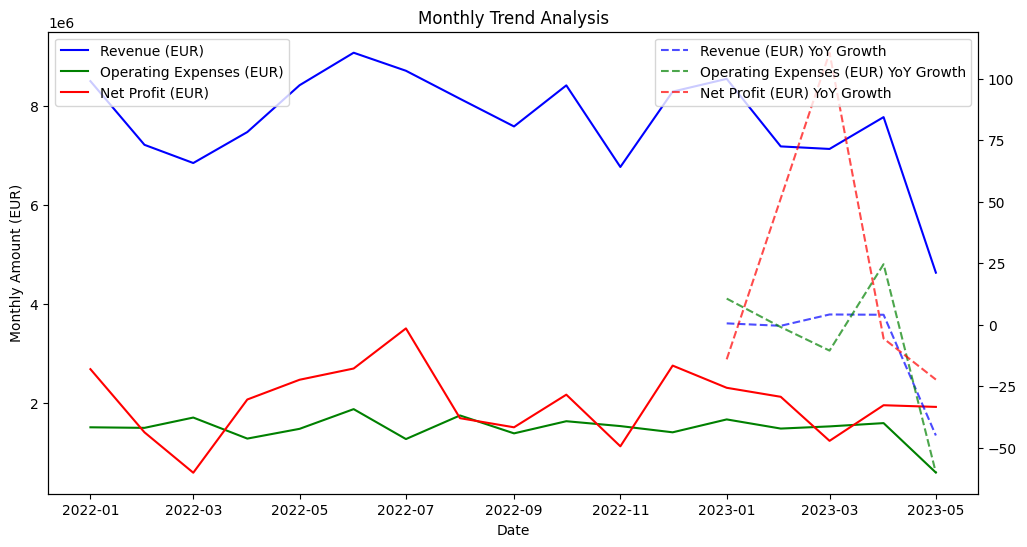

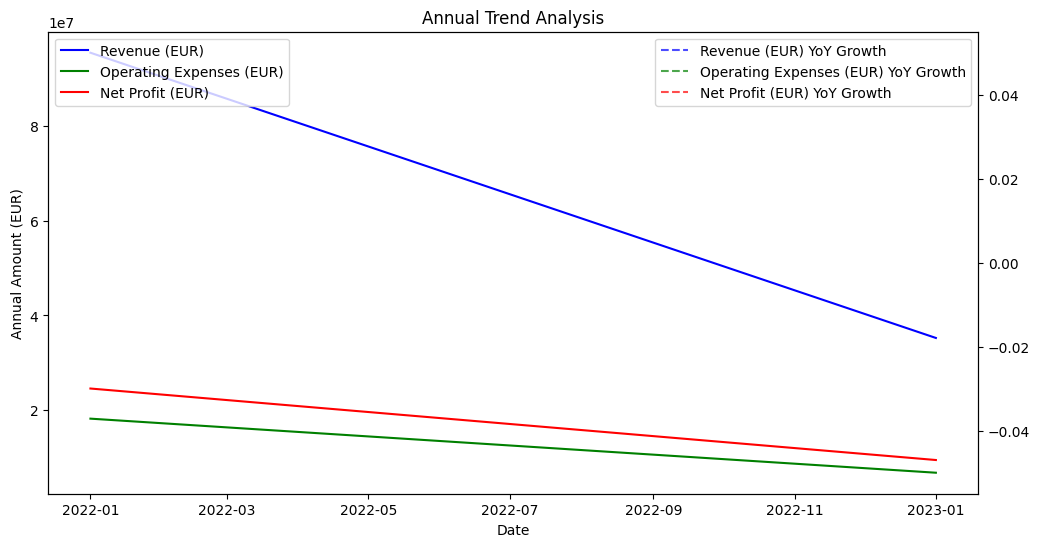

In [ ]:
import matplotlib.pyplot as plt

# Plotting function for trend analysis
def plot_trend_analysis(df, title, ylabel):
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()

    metrics = ['Revenue (EUR)', 'Operating Expenses (EUR)', 'Net Profit (EUR)']
    colors = ['blue', 'green', 'red']

    # Convert PeriodIndex to DateTimeIndex
    df = df.copy()  # Create a copy to avoid SettingWithCopyWarning
    df.index = df.index.to_timestamp()

    for i, metric in enumerate(metrics):
        ax1.plot(df.index, df[metric], label=metric, color=colors[i])
        ax2.plot(df.index, df[f'{metric} YoY Growth'], label=f'{metric} YoY Growth', linestyle='--', color=colors[i], alpha=0.7)

    ax1.set_title(title)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

# Monthly trend analysis
plot_trend_analysis(df_monthly, 'Monthly Trend Analysis', 'Monthly Amount (EUR)')

# Quarterly trend analysis
plot_trend_analysis(df_quarterly, 'Quarterly Trend Analysis', 'Quarterly Amount (EUR)')

# Annual trend analysis
plot_trend_analysis(df_annual, 'Annual Trend Analysis', 'Annual Amount (EUR)')

**Reasoning**:
Create bar charts or other suitable visualizations to compare the gross profit margin, net profit margin, and operating cash flow ratio across different time periods (monthly, quarterly, and annually).



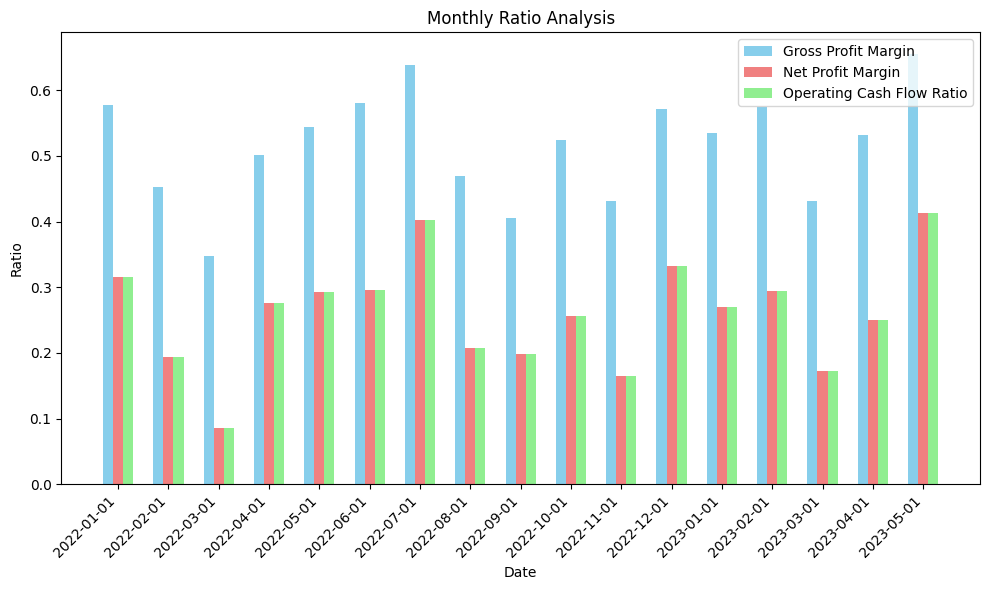

In [ ]:
import matplotlib.pyplot as plt

def plot_ratio_analysis(df, title):
    plt.figure(figsize=(10, 6))
    ratios = ['Gross Profit Margin', 'Net Profit Margin', 'Operating Cash Flow Ratio']
    colors = ['skyblue', 'lightcoral', 'lightgreen']

    df = df.copy()
    df.index = df.index.to_timestamp()

    width = 0.2
    x = range(len(df))
    for i, ratio in enumerate(ratios):
        plt.bar([val + i * width for val in x], df[ratio], width=width, label=ratio, color=colors[i])
    plt.xticks([val + width for val in x], df.index.strftime('%Y-%m-%d'), rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Ratio')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_ratio_analysis(df_monthly, 'Monthly Ratio Analysis')
plot_ratio_analysis(df_quarterly, 'Quarterly Ratio Analysis')
plot_ratio_analysis(df_annual, 'Annual Ratio Analysis')

**Reasoning**:
Visualize cash flow patterns using line charts (monthly, quarterly, and annually). Highlight any significant fluctuations or trends.



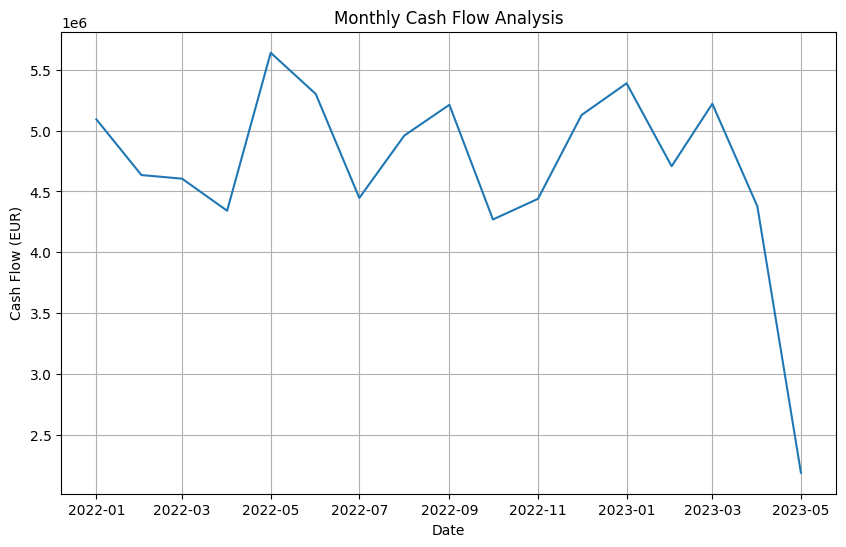

In [ ]:
import matplotlib.pyplot as plt

def plot_cash_flow_analysis(df, title):
    plt.figure(figsize=(10, 6))

    df = df.copy()
    df.index = df.index.to_timestamp()

    plt.plot(df.index, df['Cash Flow (EUR)'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Cash Flow (EUR)')
    plt.grid(True)
    plt.show()

plot_cash_flow_analysis(df_monthly, 'Monthly Cash Flow Analysis')
plot_cash_flow_analysis(df_quarterly, 'Quarterly Cash Flow Analysis')
plot_cash_flow_analysis(df_annual, 'Annual Cash Flow Analysis')

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided task description.  However, the instructions implied several questions that were answered through the analysis, including:

* **What are the key financial trends for the beer company?**  The analysis revealed trends in revenue, operating expenses, and net profit over time, visualized in the trend analysis plots.  Year-over-year growth was calculated and displayed.
* **What are the profitability ratios of the beer company?**  The analysis calculated and visualized gross profit margin, net profit margin, and operating cash flow ratio, providing insights into the company's profitability.
* **What is the cash flow situation for the company?** The cash flow was analyzed at different frequencies and visualized using line charts.
* **Are there any significant outliers or inconsistencies in the financial data?** The data cleaning process addressed this by identifying and handling outliers using the IQR method, and converting relevant columns to numeric data types.

### 2. Data Analysis Key Findings

* **No Missing Data:** The dataset contained no missing values, simplifying the analysis process.
* **Outlier Treatment:** Outliers in key financial metrics were identified and treated using the IQR method.
* **Profitability Trends:** Year-over-year (YoY) growth rates were calculated for revenue, operating expenses, and net profit, allowing for the identification of growth or decline trends.
* **Profitability Ratios:** Key profitability ratios, including gross profit margin, net profit margin, and operating cash flow ratio, were calculated and visualized.  These ratios provide insights into the company's efficiency in generating profit.
* **Cash Flow Analysis:** The cash flow analysis revealed the cash flow patterns at monthly, quarterly, and annual frequencies, providing insights into the company's liquidity.
* **Negative Gross Profit:** The minimum Gross Profit value is significantly negative, which requires further investigation.

### 3. Insights or Next Steps

* **Investigate Negative Gross Profit:**  The presence of negative gross profit values warrants further investigation to understand the underlying causes and potential implications for the company's financial health.  This could involve examining specific product lines, regions, or time periods where these negative values occurred.
* **Variance Analysis with Budget Data:**  Incorporate budget data for a more comprehensive variance analysis to compare actual performance against planned targets, which can provide insights for performance improvement.
